In [2]:
# https://textbook.nipraxis.org/images_3d.html
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nipraxis

In [3]:
plt.rcParams['image.cmap'] = 'gray' # Set 'gray' as the default colormap
np.set_printoptions(precision=4, suppress=True) # Display array values to 4 digits of precision
path = "C:/Users/tssan/OneDrive/Desktop/EngPsych/scans35/s046_anat.nii"


In [4]:
structural_fname = nipraxis.fetch_file('ds114_sub009_highres.nii')
structural_fname

'C:\\Users\\tssan\\AppData\\Local\\nipraxis\\nipraxis\\Cache\\0.5\\ds114_sub009_highres.nii'

In [5]:
img = nib.load(path)
img

In [6]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 172   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.2 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -97.444
qoffset_y       : 138.75
qoffset_z       : 87.1872
srow_x          : [ -0.     -0.    

In [7]:
img.shape
data = img.get_fdata()
data.dtype

dtype('float64')

In [8]:
data_mean = np.mean(data)
data_std = np.std(data)
print(f"The mean intensity of this image is {data_mean}, and the standard deviation is {data_std}.")

The mean intensity of this image is 413.3457894436149, and the standard deviation is 649.7158275963945.


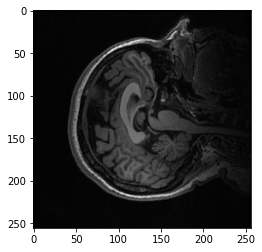

In [9]:
middle_slice = data[:, :, img.shape[-1] // 2 - 1]
plt.imshow(middle_slice)

(array([ 406884., 5360098., 1995749.,  353171.,  245385.,  201994.,
         172454.,  140259.,  120165.,  103572.,   96325.,   89539.,
          85555.,   83943.,   81374.,   82161.,   81304.,   85748.,
          86126.,   87302.,   84898.,   82658.,   76660.,   73647.,
          67467.,   63270.,   60041.,   54507.,   52849.,   49081.,
          48251.,   46629.,   47380.,   48507.,   52365.,   53567.,
          52112.,   43592.,   33451.,   26504.,   20121.,   15443.,
          11683.,    9848.,    8565.,    8120.,    7685.,    7239.,
           6894.,    6623.,    6514.,    6032.,    5944.,    5477.,
           5363.,    4878.,    4764.,    4526.,    4273.,    3986.,
           3893.,    3595.,    3311.,    3161.,    2867.,    2703.,
           2462.,    2355.,    2125.,    2024.,    1808.,    1670.,
           1436.,    1252.,    1146.,    1002.,     851.,     782.,
            666.,     537.,     438.,     373.,     288.,     226.,
            215.,     131.,     110.,      79., 

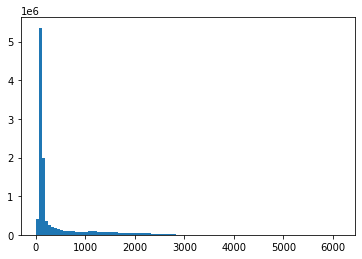

In [10]:
# Show histogram of the values in the 3D image.
plt.hist(np.ravel(data), bins=100)

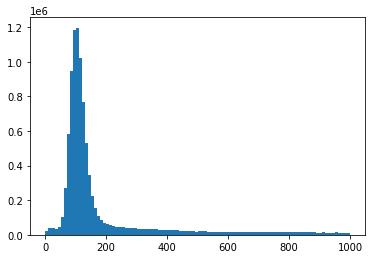

In [11]:
# Show histogram of the values in the 3D image, but selecting only voxels
# with values > 0 and < 1000
is_above_0 = data > 0
is_below_1000 = data < 1000
# Combine the two selections with & (True if both are True).
is_both = is_above_0 & is_below_1000
plt.hist(data[is_both], bins=100);

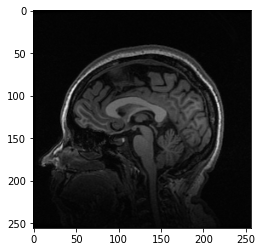

In [12]:
plt.imshow(middle_slice.T)

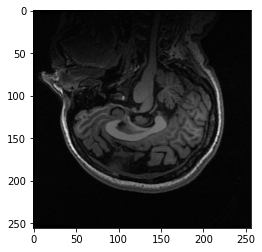

In [13]:
to_display = np.flipud(middle_slice.T)
plt.imshow(to_display)

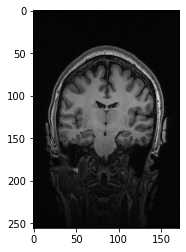

In [14]:
yz_slice = data[img.shape[0] // 2 - 1, :, :]
yz_slice.shape
plt.imshow(yz_slice)

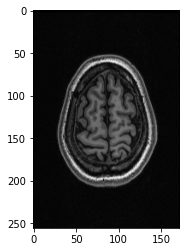

In [15]:
xz_slice = data[:, 78, :]
xz_slice.shape
plt.imshow(xz_slice)

<OrthoSlicer3D: C:/Users/tssan/OneDrive/Desktop/EngPsych/scans35/s046_anat.nii (172, 256, 256)>

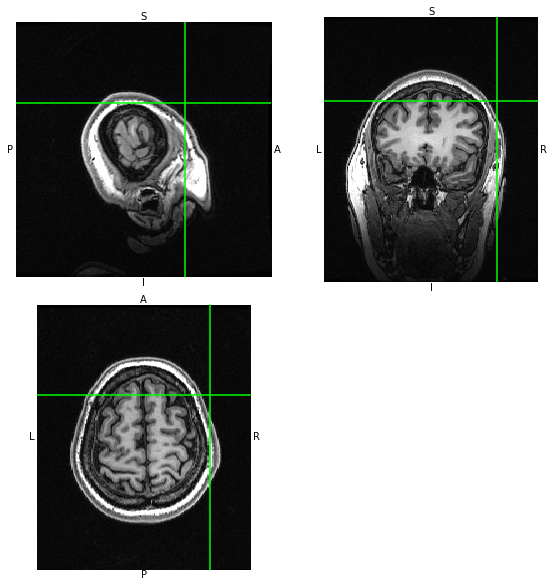

In [16]:
img.orthoview()

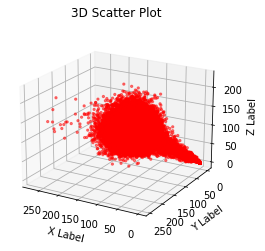

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your numpy.memmap array is stored in a variable called 'data'
# Replace 'data' with the actual variable name in your environment

# Extract x, y, z coordinates from your memmap_data
x = data[..., 0]  # Replace '0' with the index corresponding to x-coordinates
y = data[..., 1]  # Replace '1' with the index corresponding to y-coordinates
z = data[..., 2]  # Replace '2' with the index corresponding to z-coordinates

# Create a 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x,y,z,   c='r', marker='o', s=5, alpha=0.5)

# Customize the plot as needed
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Rotate the view - adjust the elev and azim values as needed
ax.view_init(elev=20, azim=120)

# Show the plot
plt.show()

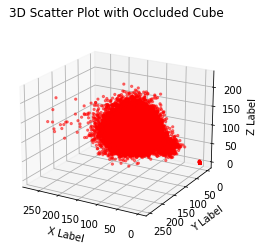

In [34]:

# OCCLUDE BRAIN STEM
x_min, x_max = 0, 50  # Example values, adjust as needed
y_min, y_max = 0, 50  # Example values, adjust as needed
z_min, z_max = 0, 50  # Example values, adjust as needed

# Use boolean indexing to filter out points within the specified cube
mask = ~((x > x_min) & (x < x_max) & (y > y_min) & (y < y_max) & (z > z_min) & (z < z_max))
x_filtered = x[mask]
y_filtered = y[mask]
z_filtered = z[mask]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with occluded section
ax.scatter(x_filtered, y_filtered, z_filtered, c='r', marker='o', s=5, alpha=0.5)

# Customize the plot
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with Occluded Cube')

# Rotate the view
ax.view_init(elev=20, azim=120)

# Show the plot
plt.show()


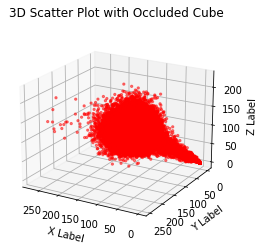

In [49]:

# Define the bounds of the NxNxN section to occlude
x_min, x_max = 150, 250  # Example values, adjust as needed
y_min, y_max = 0, 100  # Example values, adjust as needed
z_min, z_max = 150, 250  # Example values, adjust as needed

# Use boolean indexing to filter out points within the specified cube
mask = ~((x > x_min) & (x < x_max) & (y > y_min) & (y < y_max) & (z > z_min) & (z < z_max))
x_filtered = x[mask]
y_filtered = y[mask]
z_filtered = z[mask]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with occluded section
ax.scatter(x_filtered, y_filtered, z_filtered, c='r', marker='o', s=5, alpha=0.5)

# Customize the plot
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with Occluded Cube')

# Rotate the view
ax.view_init(elev=20, azim= 120)

# Show the plot
plt.show()


In [51]:


# Max values in each dimension, for defining quarters, halves, etc.
print(np.max(data, axis=0))
x_max, y_max, z_max = np.max(data, axis=0)

# Define intervals for occlusion based on quarters and halves
intervals = {
    'quarter': [(0.25 * x_max, 0.5 * x_max), (0.25 * y_max, 0.5 * y_max), (0.25 * z_max, 0.5 * z_max)],
    'half': [(0.5 * x_max, 0.75 * x_max), (0.5 * y_max, 0.75 * y_max), (0.5 * z_max, 0.75 * z_max)],
    # Add other denominations as needed
}

# Initialize figure for plotting
fig = plt.figure(figsize=(18, 6))

# Loop over each interval to plot data with occlusions
for i, (label, ((x_min, x_max), (y_min, y_max), (z_min, z_max))) in enumerate(intervals.items(), start=1):
    ax = fig.add_subplot(1, len(intervals), i, projection='3d')

    # Filter data based on current interval
    mask = ~((data[:, 0] > x_min) & (data[:, 0] < x_max) &
             (data[:, 1] > y_min) & (data[:, 1] < y_max) &
             (data[:, 2] > z_min) & (data[:, 2] < z_max))

    # Plot filtered data
    ax.scatter(data[mask, 0], data[mask, 1], data[mask, 2], c='r', marker='o', s=5, alpha=0.5)

    # Customize plot
    ax.set_title(f'{label.capitalize()} Occlusion')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[[ 19.  23.  25. ...   7.   5.   3.]
 [ 28.  31.  38. ...   9.   5.   4.]
 [ 76.  75.  99. ...  75.  60.  54.]
 ...
 [104. 124.  99. ...  67.  64.  75.]
 [ 52.  55.  68. ...  34.  36.  34.]
 [ 34.  47.  45. ...  34.  33.  34.]]


ValueError: too many values to unpack (expected 3)